# Etude de marché de l'enseigne la poule qui chante

# Import des librairies

In [264]:
import pandas as pd
import numpy as np


from sklearn.preprocessing  import StandardScaler 
from sklearn.decomposition import PCA


import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection

import seaborn as sns
import scipy.stats as st

from sklearn import datasets
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.cluster import AgglomerativeClustering
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix



# Chargement des données

In [265]:
df_acp = pd.read_csv('df_acp.csv')
df_acp

,Zone,Disponibilité alimentaire (Kcal/personne/jour),Exportations,Importations,Production,TDI,TAS,evol_pop
0,Afghanistan,5.0,0.0,29.0,28.0,50.877193,49.122807,0.340868
1,Afrique du Sud,143.0,63.0,514.0,1667.0,24.268178,78.706327,0.160971
2,Albanie,85.0,0.0,38.0,13.0,74.509804,25.490196,-0.039944
3,Algérie,22.0,0.0,2.0,275.0,0.722022,99.277978,0.215885
4,Allemagne,71.0,646.0,842.0,1514.0,49.239766,88.538012,0.025395
...,...,...,...,...,...,...,...,...
158,Égypte,50.0,1.0,110.0,1118.0,8.964955,91.116544,0.235917
159,Émirats arabes unis,147.0,94.0,433.0,48.0,111.886305,12.403101,0.358485
160,Équateur,83.0,0.0,0.0,340.0,0.000000,100.000000,0.175335
161,Éthiopie,0.0,0.0,1.0,14.0,6.666667,93.333333,0.317286


# Clustering

In [266]:
df_acp=df_acp.reset_index(drop=True)

In [267]:
#creation de df sans les pays pour le centrage et reduction
X = df_acp.drop(columns=['Zone'])
# mettre les pays à part
names = df_acp['Zone']

# index des variables
attributes = df_acp.drop(columns=['Zone']).columns

# Centrage et reduction des données

In [268]:
# On redimention et transforme nos données --> Centrage et reduction
scaler = StandardScaler()

scaler.fit(X)

# obtention des variables centrées réduites
X_scaled = scaler.transform(X)
X_scaled 

array([[-1.17348601, -0.29164427, -0.30137769, ...,  0.23663785,
        -0.45987439,  1.2794211 ],
       [ 1.19051133,  0.07421146,  2.5016121 , ..., -0.40400335,
         0.13025731,  0.04420239],
       [ 0.19694723, -0.29164427, -0.24936345, ...,  0.80561886,
        -0.93129744, -1.33532555],
       ...,
       [ 0.1626864 , -0.29164427, -0.46897914, ..., -0.98828631,
         0.55502326,  0.14282739],
       [-1.25913809, -0.29164427, -0.46319978, ..., -0.82777901,
         0.42203667,  1.11750091],
       [-0.95079061, -0.29164427, -0.43430298, ...,  1.41932326,
        -1.43977557,  0.97819827]])

# 1) Avec l'algorithme de Kmeans

In [269]:
# On instancie notre Kmeans avec 5 clusters : 

kmeans = KMeans(random_state = 0, n_clusters=5)

# On l'entraine : 
kmeans.fit(X)

# On peut stocker nos clusters dans une variable clusters : 
clusters = kmeans.labels_
clusters
# On peut stocker nos centroids dans une variable : 
centroids = kmeans.cluster_centers_
centroids
# Nous devons également calculer nos centroides.
centroids_scaled = scaler.fit_transform(centroids)
centroids_scaled

array([[-1.29663855, -0.70373476, -1.105948  , -1.12262625,  0.01070449,
        -1.00235415,  1.67003059],
       [ 0.41289179, -0.2181666 , -0.60118586,  0.15048878, -0.84984942,
        -0.22720457,  0.08219126],
       [ 1.27342984, -0.56059462,  0.96046308,  1.8017326 , -0.72744713,
        -0.53854568, -0.3605496 ],
       [ 0.65683294, -0.49244509, -0.67885439, -0.66650078, -0.33950331,
        -0.13833133,  0.04776007],
       [-1.04651602,  1.97494107,  1.42552516, -0.16309435,  1.90609537,
         1.90643574, -1.43943231]])

 # Analyse des centroîdes

In [270]:
 # Analyse des centroîdes
df_clusters = df_acp.copy()

# on rajoute la colonne clusters a notre data frame
df_clusters['clusters'] = clusters

# on regroupe les clusters par la moyenne
df_clusters.groupby('clusters').mean()

,Disponibilité alimentaire (Kcal/personne/jour),Exportations,Importations,Production,TDI,TAS,evol_pop
clusters,,,,,,,
0,65.864000,7.240000,39.144000,66.824000,46.372451,59.545071,0.173134
1,97.550000,193.000000,175.900000,1712.300000,8.654357,106.014530,0.098781
2,113.500000,62.000000,599.000000,3846.500000,14.019252,87.349935,0.078049
3,102.071429,88.071429,154.857143,656.357143,31.022837,111.342394,0.097169
4,70.500000,1032.000000,725.000000,1307.000000,129.447469,233.924178,0.027529


### Analyse des centroîdes

On constate que : 

cluster 0 regroupe plutot les pays qui produisent peu et imprte peu, ont une disponibilité alimentaire moyenne en revanche une population en croissance 17% probablement ceux sont généralement les pays qui manquent des moyens ou des pays de tiers monde

cluster 1 c'est ceux qui produisent beaucoup avec un taux d'autosiffisance alimentaire complet, qui depend pas de l'import(TDI faible), en revanche une disponibilité alimentaire moyenne.

cluster 2 des pays qui ont une forte disponibilité alimentaire qui produisent enormement avec un TAS important contre uniquement TDI de 14% (import imprtant contre export faible)

cluster 3 des pays qui ont exportent peu, produisent moyenement, disponibilité trop importante et TAS elevé

cluster 4 des pays qui  importent (exportent) beaucoup,  taux de dependance d'import important  et qui ont un TAS élevé

Donc  le cluster 3 pourrait être un bon choix pour exporter les poulets dans ces pays

# Realiser une ACP

## Definir les composentes de l'Acp

In [271]:
# Definir les composante de notre acp
n_components = 6

pca = PCA(n_components=n_components)

 # acp sur notre df
pca.fit(X_scaled)

PCA(n_components=6)

## Variance expliqué

In [272]:
pca.explained_variance_ratio_

scree = (pca.explained_variance_ratio_*100).round(2)

scree

array([33.6 , 19.99, 16.97, 13.93,  8.36,  5.07])

## Tracer les eboulis des valeurs propores

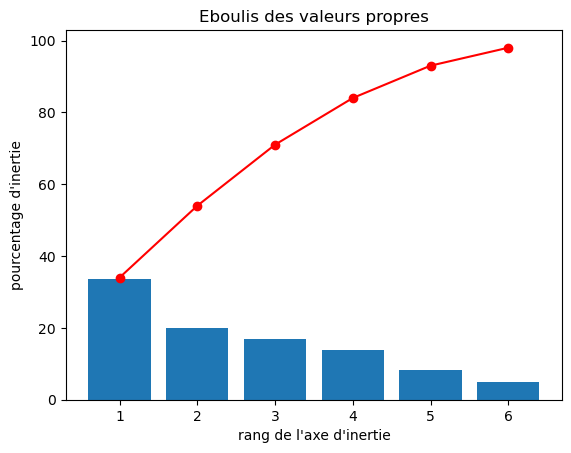

In [273]:
# on calcule la somme cummule des variances
scree_cum = scree.cumsum().round()

# Définisons ensuite une variable avec la liste de nos composantes 
x_list = range(1, n_components+1)

#  l'afficher de façon graphique :

plt.bar(x_list, scree)
plt.plot(x_list, scree_cum,c="red",marker='o')
plt.xlabel("rang de l'axe d'inertie")
plt.ylabel("pourcentage d'inertie")
plt.title("Eboulis des valeurs propres")
plt.show(block=False)

In [274]:
scree_cum

array([34., 54., 71., 84., 93., 98.])

## Le cercle de correclation

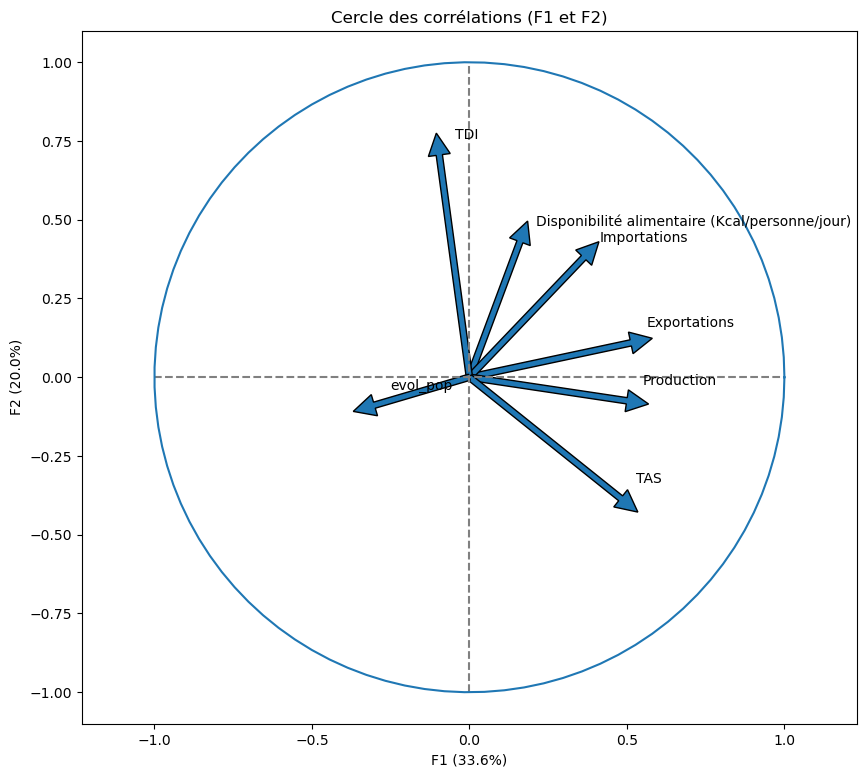

In [275]:
def correlation_graph(pca, 
                      x_y, 
                      attributes) : 
    """Affiche le graphe des correlations

    Positional arguments : 
    -----------------------------------
    pca : sklearn.decomposition.PCA : notre objet PCA qui a été fit
    x_y : list ou tuple : le couple x,y des plans à afficher, exemple [0,1] pour F1, F2
    features : list ou tuple : la liste des features (ie des dimensions) à représenter
    """

    # Extrait x et y 
    x,y=x_y

    # Taille de l'image (en inches)
    fig, ax = plt.subplots(figsize=(10, 9))

    # Pour chaque composante : 
    for i in range(0, pca.components_.shape[1]):

        # Les flèches
        ax.arrow(0,0, 
                pca.components_[x, i],  
                pca.components_[y, i],  
                head_width=0.07,
                head_length=0.07, 
                width=0.02, )

        # Les labels
        plt.text(pca.components_[x, i] + 0.05,
                pca.components_[y, i] + 0.05,
                attributes[i])
        
    # Affichage des lignes horizontales et verticales
    plt.plot([-1, 1], [0, 0], color='grey', ls='--')
    plt.plot([0, 0], [-1, 1], color='grey', ls='--')

    # Nom des axes, avec le pourcentage d'inertie expliqué
    plt.xlabel('F{} ({}%)'.format(x+1, round(100*pca.explained_variance_ratio_[x],1)))
    plt.ylabel('F{} ({}%)'.format(y+1, round(100*pca.explained_variance_ratio_[y],1)))

    # J'ai copié collé le code sans le lire
    plt.title("Cercle des corrélations (F{} et F{})".format(x+1, y+1))

    # Le cercle 
    an = np.linspace(0, 2 * np.pi, 100)
    plt.plot(np.cos(an), np.sin(an))  # Add a unit circle for scale

    # Axes et display
    plt.axis('equal')
    plt.show(block=False)
    
x_y = (0,1)
correlation_graph(pca, (0,1), attributes)


### Projections des individus

In [276]:
# calculons les coordonnées de nos individus dans le nouvel espace :

In [277]:
X_proj = pca.transform(X_scaled)

pd.DataFrame(X_proj)

,0,1,2,3,4,5
0,-1.328580,-0.383095,1.298842,0.259159,-0.061755,0.202734
1,2.143934,0.993267,-0.343708,2.287850,0.059723,-0.542920
2,-0.592786,1.042538,-0.840004,-0.788309,0.937150,0.326431
3,-0.307293,-1.503814,0.334821,0.064849,0.040191,-0.183430
4,4.576331,1.999107,1.788195,1.205282,1.225909,-0.623948
...,...,...,...,...,...,...
158,0.463169,-0.959695,0.202198,1.040292,-0.104133,0.259370
159,-0.325903,2.914125,1.005020,1.192226,-0.723244,-0.821573
160,-0.004888,-1.058724,-0.476176,0.043312,-0.412274,-0.344131
161,-0.837034,-1.555459,1.008255,0.146400,-0.154837,-0.295945


In [278]:
def display_factorial_planes(   X_projected, 
                                x_y, 
                                pca=None, 
                                labels = None, 
                                clusters=None, 
                                alpha=1,
                                figsize=[10,8], 
                                marker="." ):
    """
    Affiche la projection des individus

    Positional arguments : 
    -------------------------------------
    X_projected : np.array, pd.DataFrame, list of list : la matrice des points projetés
    x_y : list ou tuple : le couple x,y des plans à afficher, exemple [0,1] pour F1, F2

    Optional arguments : 
    -------------------------------------
    pca : sklearn.decomposition.PCA : un objet PCA qui a été fit, cela nous permettra d'afficher la variance de chaque composante, default = None
    labels : list ou tuple : les labels des individus à projeter, default = None
    clusters : list ou tuple : la liste des clusters auquel appartient chaque individu, default = None
    alpha : float in [0,1] : paramètre de transparence, 0=100% transparent, 1=0% transparent, default = 1
    figsize : list ou tuple : couple width, height qui définit la taille de la figure en inches, default = [10,8] 
    marker : str : le type de marker utilisé pour représenter les individus, points croix etc etc, default = "."
    """

    # Transforme X_projected en np.array
    X_ = np.array(X_projected)

    # On définit la forme de la figure si elle n'a pas été donnée
    if not figsize: 
        figsize = (7,6)

    # On gère les labels
    if  labels is None : 
        labels = []
    try : 
        len(labels)
    except Exception as e : 
        raise e

    # On vérifie la variable axis 
    if not len(x_y) ==2 : 
        raise AttributeError("2 axes sont demandées")   
    if max(x_y )>= X_.shape[1] : 
        raise AttributeError("la variable axis n'est pas bonne")   

    # on définit x et y 
    x, y = x_y

    # Initialisation de la figure       
    fig, ax = plt.subplots(1, 1, figsize=figsize)

    # On vérifie s'il y a des clusters ou non
    c = None if clusters is None else clusters
 
    # Les points    
    # plt.scatter(   X_[:, x], X_[:, y], alpha=alpha, 
    #                     c=c, cmap="Set1", marker=marker)
    sns.scatterplot(data=None, x=X_[:, x], y=X_[:, y], hue=c, palette="deep")

    # Si la variable pca a été fournie, on peut calculer le % de variance de chaque axe 
    if pca : 
        v1 = str(round(100*pca.explained_variance_ratio_[x]))  + " %"
        v2 = str(round(100*pca.explained_variance_ratio_[y]))  + " %"
    else : 
        v1=v2= ''

    # Nom des axes, avec le pourcentage d'inertie expliqué
    ax.set_xlabel(f'F{x+1} {v1}')
    ax.set_ylabel(f'F{y+1} {v2}')

    # Valeur x max et y max
    x_max = np.abs(X_[:, x]).max() *1.1
    y_max = np.abs(X_[:, y]).max() *1.1

    # On borne x et y 
    ax.set_xlim(left=-x_max, right=x_max)
    ax.set_ylim(bottom= -y_max, top=y_max)

    # Affichage des lignes horizontales et verticales
    plt.plot([-x_max, x_max], [0, 0], color='red', alpha=0.8)
    plt.plot([0,0], [-y_max, y_max], color='red', alpha=0.8)

    # Affichage des labels des points
    if len(labels) : 
        # j'ai copié collé la fonction sans la lire
        for i,(_x,_y) in enumerate(X_[:,[x,y]]):
            plt.text(_x, _y+0.05, labels[i], fontsize='14', ha='center',va='center') 

    # Titre et display
    plt.title(f"Projection des individus (sur F{x+1} et F{y+1})")
    plt.show()

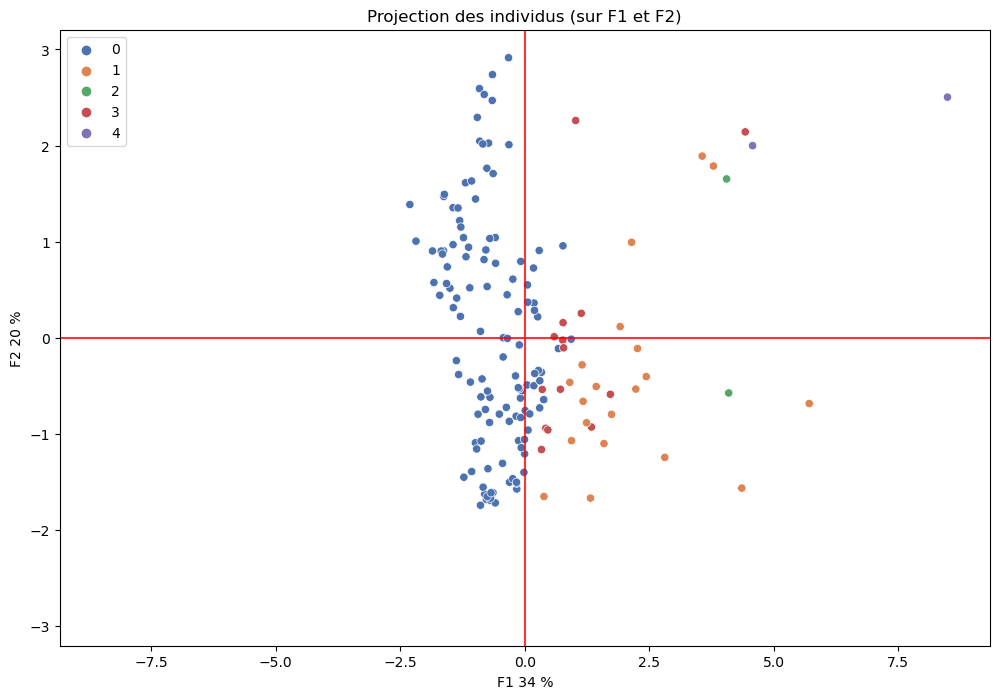

In [248]:
x_y = [0,1]

#display_factorial_planes(X_proj, x_y, pca, labels=names, marker="o",figsize(20,16))
display_factorial_planes(X_proj, 
                                x_y, 
                                pca, 
                                labels = None, 
                                clusters=clusters, 
                                alpha=1,
                                figsize=[12,8],
                              marker="s"   )

# Analyse les clusters via ACP 


Cluster 2  produisent beaucoup, importe bcp et evolution de population  faible

Cluster 1 des pays avec un TAS important et importation élevé production importante en revanche evolution de population est faible

Cluster 0 des pays qui ont TDI trop élevé et une population croissante avec une disponibilité alimentaire faible probablement les pays sous développé

Cluster 3 des pays qui produisent moyennement avec un TAS moyen, importation élevée et evolution de population faible

Cluster 4 : ceux sont des pays  des pays qui importent beaucoup et evolution de population faible, ce serait probablement mon cluster cible



In [254]:
df_clusters[df_clusters['clusters'] ==3].sort_values(by = 'TDI', ascending = False)


,Zone,Disponibilité alimentaire (Kcal/personne/jour),Exportations,Importations,Production,TDI,TAS,evol_pop,clusters
16,Belgique,44.0,656.0,338.0,463.0,233.103448,319.310345,0.065260,3
7,Arabie saoudite,151.0,10.0,722.0,616.0,54.367470,46.385542,0.301841,3
117,Roumanie,66.0,69.0,146.0,392.0,31.130064,83.582090,-0.063535,3
154,Viet Nam,48.0,1.0,291.0,918.0,24.089404,75.993377,0.107864,3
29,Chili,153.0,115.0,155.0,712.0,20.611702,94.680851,0.120952,3
31,"Chine, Taiwan Province de",126.0,8.0,161.0,652.0,20.000000,80.993789,0.030732,3
61,Hongrie,104.0,210.0,58.0,493.0,17.008798,144.574780,-0.028460,3
121,République de Corée,62.0,6.0,137.0,838.0,14.138287,86.480908,0.040446,3
158,Égypte,50.0,1.0,110.0,1118.0,8.964955,91.116544,0.235917,3
23,Bélarus,95.0,152.0,21.0,463.0,6.325301,139.457831,-0.000025,3


#  Clustering avec CAH

## calculer nos distances . 

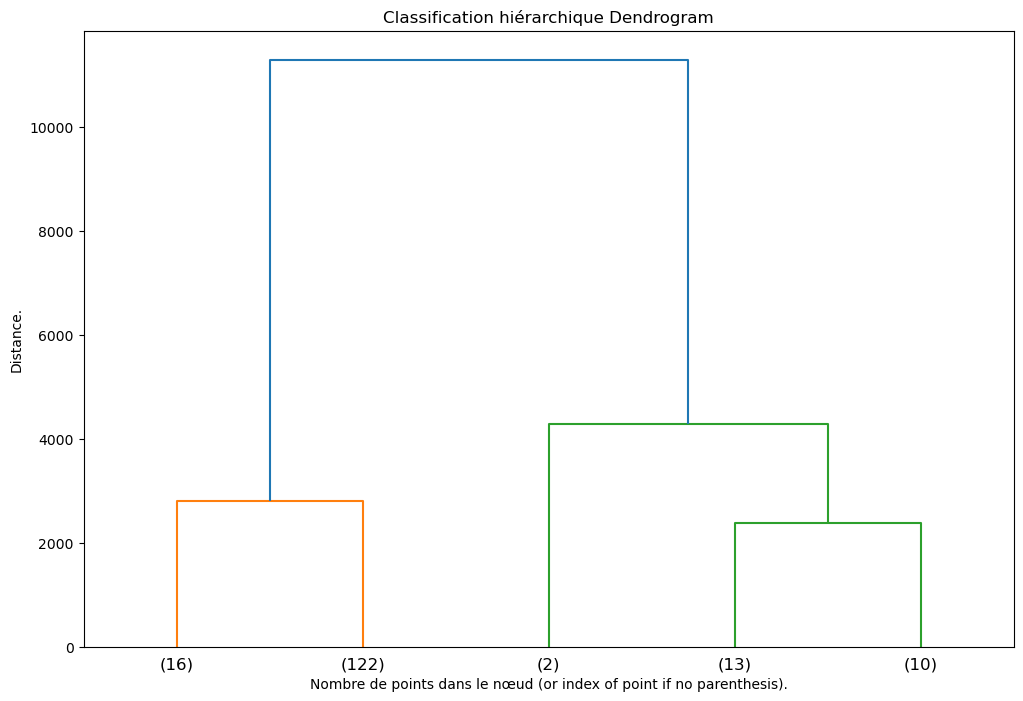

In [262]:
# #calculer nos distances . Cette matrice de distance est notée en général Z :
Z = linkage(X, method="ward")

# afficher notre dendrogramme

# on spécifie qu'on ne veut que 5 clusters affichés, pour ne pas avoir un arbre illisible.

fig, ax = plt.subplots(1, 1, figsize=(12, 8))

_ = dendrogram(Z, p=5, truncate_mode="lastp", ax=ax)

plt.title("Classification hiérarchique Dendrogram")
plt.xlabel("Nombre des pays dans le nœud (ou l' index des des pays si hors parenthesis).")
plt.ylabel("Distance.")
plt.show()

In [258]:
#On applique ensuite la fonction fclusters de scipy pour définir les clusters :

clusters = fcluster(Z, 5, criterion='maxclust')
clusters

array([2, 4, 2, 2, 5, 2, 2, 1, 5, 2, 4, 2, 2, 2, 2, 2, 1, 2, 1, 2, 2, 2,
       2, 1, 2, 2, 2, 2, 4, 1, 2, 1, 2, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4,
       2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 5, 5, 2, 2,
       2, 1, 4, 2, 5, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 2, 2,
       2, 2, 1, 2, 2, 3, 2, 2, 2, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 2,
       2, 5, 4, 5, 2, 1, 4, 1, 5, 2, 2, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 5, 2, 2, 2, 2, 2, 5, 4, 2, 2, 1,
       1, 2, 2, 2, 4, 2, 1, 2, 2], dtype=int32)

In [260]:
# comparer les clusters
pd.crosstab(clusters,df_clusters['clusters'])

clusters,0,1,2,3,4
row_0,,,,,
1,3,0,0,13,0
2,122,0,0,0,0
3,0,0,2,0,0
4,0,12,0,1,0
5,0,8,0,0,2
